#Importing required Libraries and Loading the dataset

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files

In [2]:
# Read the dataset
df = pd.read_csv('yield_df.csv')

In [3]:
print(df.columns)

Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')


In [4]:
# Drop the unnamed column
df = df.drop('Unnamed: 0', axis=1)

In [5]:
print(df.columns)

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')


In [6]:
# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())

print("\nFirst few rows of the dataset:")
print(df.head())

# Check unique values in categorical columns
print("\nUnique Areas:", df['Area'].nunique())
print("\nUnique Items (Crops):", df['Item'].nunique())
print("\nYear Range:", df['Year'].min(), "to", df['Year'].max())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB
None

First few rows of the dataset:
      Area         Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0  Albania        Maize  1990        36613                         1485.0   
1  Albania     Potatoes  1990        66667                         1485.0   
2  Alba

#1. Exploratory Data Analysis (EDA)

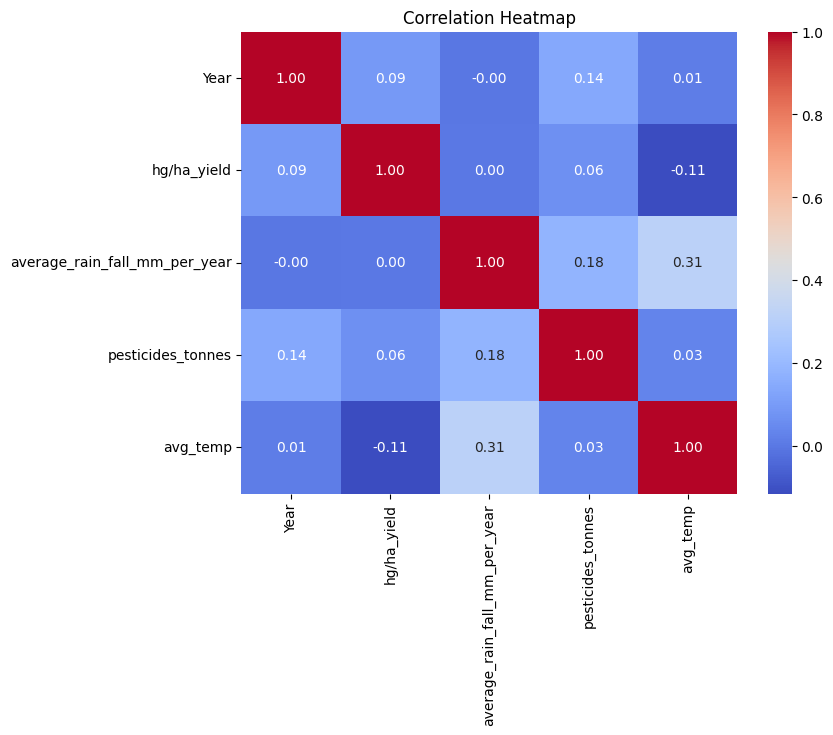

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
# Filter numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Generate the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


#2. Statistical analysis

In [8]:
from scipy.stats import ttest_ind, f_oneway

# Define features to analyze
features = ["avg_temp", "average_rain_fall_mm_per_year", "pesticides_tonnes"]

# Example: t-test between high and low yield groups
high_yield = df[df['hg/ha_yield'] > df['hg/ha_yield'].median()]
low_yield = df[df['hg/ha_yield'] <= df['hg/ha_yield'].median()]

# Perform t-tests for each feature
for feature in features:
    stat, p_value = ttest_ind(high_yield[feature], low_yield[feature], nan_policy='omit')
    print(f"T-test for {feature}: stat={stat:.3f}, p={p_value:.3f}")

# ANOVA test
anova_result = f_oneway(df["avg_temp"], df["average_rain_fall_mm_per_year"], df["pesticides_tonnes"])
print(f"ANOVA result: stat={anova_result.statistic:.3f}, p={anova_result.pvalue:.3f}")


T-test for avg_temp: stat=-17.166, p=0.000
T-test for average_rain_fall_mm_per_year: stat=11.403, p=0.000
T-test for pesticides_tonnes: stat=7.068, p=0.000
ANOVA result: stat=10467.387, p=0.000


#3.Multi Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Splitting data
X = df[["avg_temp", "average_rain_fall_mm_per_year", "pesticides_tonnes"]]
y = df["hg/ha_yield"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multi Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Evaluation
print("Linear Regression Metrics:")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


Linear Regression Metrics:
MAE: 64100.00
RMSE: 84254.64
R² Score: 0.02


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#Multi linear regression actual vs predicted graph

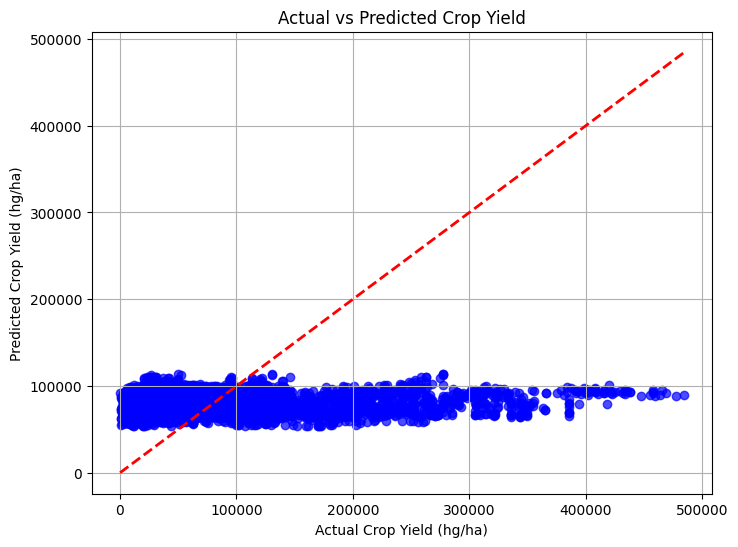

In [10]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Reference line
plt.title("Actual vs Predicted Crop Yield")
plt.xlabel("Actual Crop Yield (hg/ha)")
plt.ylabel("Predicted Crop Yield (hg/ha)")
plt.grid(True)
plt.show()


#4. Random Forest and Feature Importance

Random Forest Metrics:
MAE: 70951.29
RMSE: 93381.12
R² Score: -0.20
                         Feature  Importance
0                       avg_temp    0.442045
2              pesticides_tonnes    0.335438
1  average_rain_fall_mm_per_year    0.222517


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
<ipython-input-11-9f4a741654eb>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


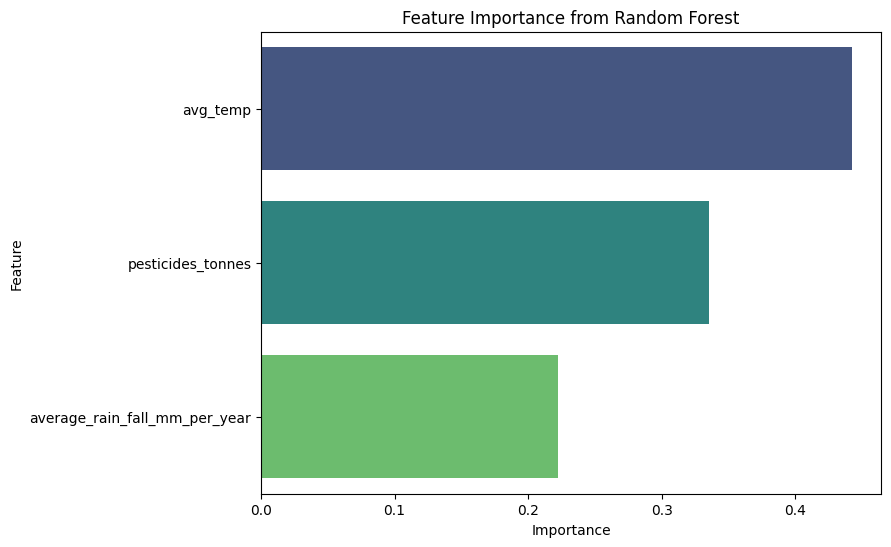

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Metrics:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_rf, squared=False):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_rf):.2f}")

# Feature Importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Visualization of feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.show()


#Random forest of actual vs predicted

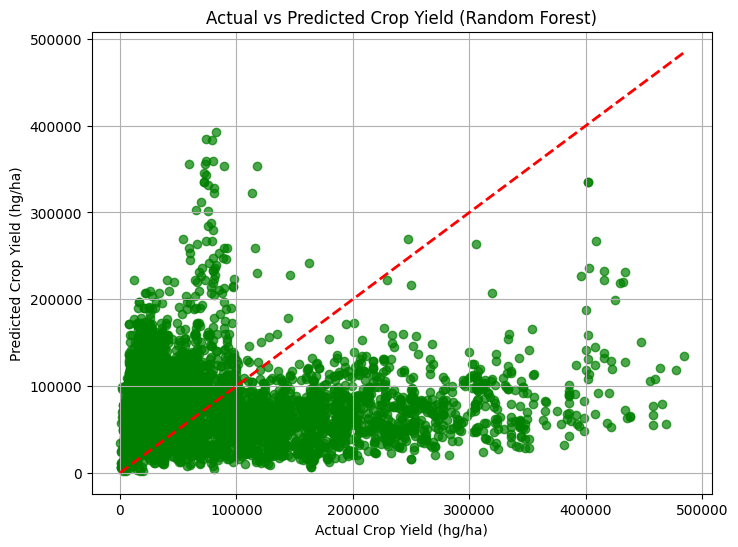

In [12]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Reference line
plt.title("Actual vs Predicted Crop Yield (Random Forest)")
plt.xlabel("Actual Crop Yield (hg/ha)")
plt.ylabel("Predicted Crop Yield (hg/ha)")
plt.grid(True)
plt.show()


#5. Cross Validation

In [13]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R² Score: {cv_scores.mean():.2f}")


Cross-Validation R² Scores: [-0.04125746 -0.13351182  0.00486732  0.06647081  0.03506937]
Mean R² Score: -0.01


#**Data Visualizations**

#Bar graph

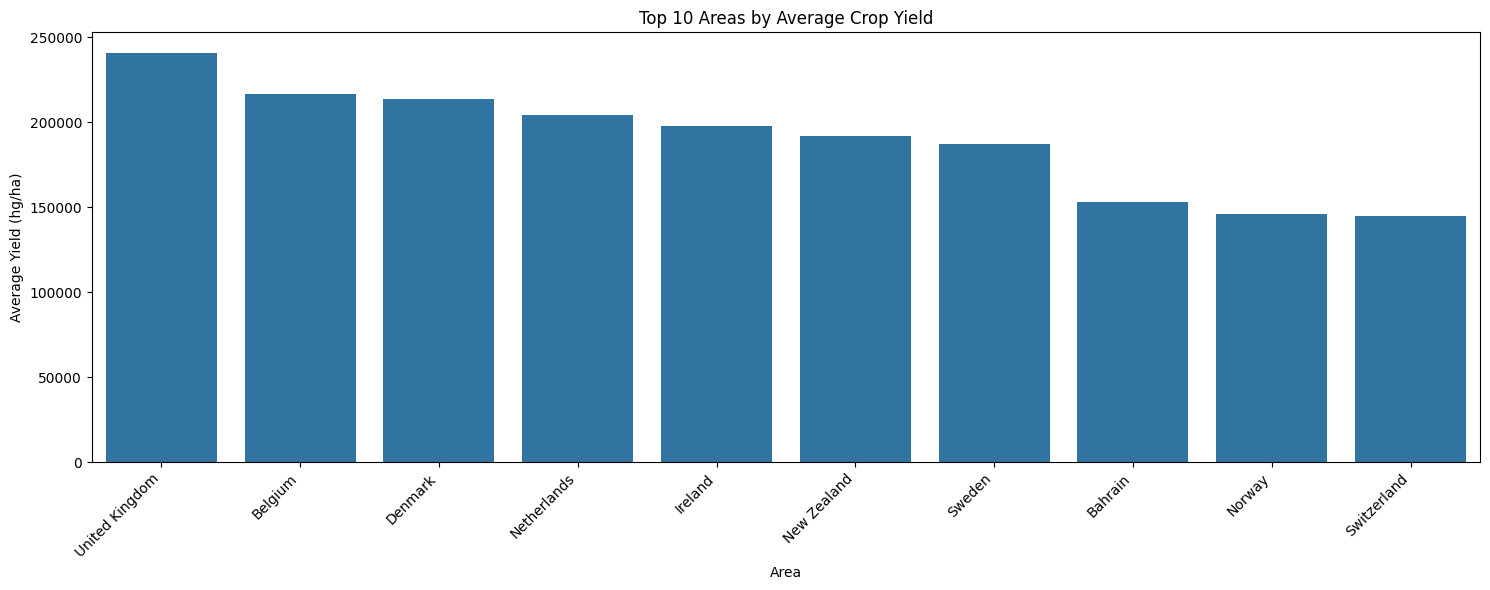

In [14]:
plt.figure(figsize=(15, 6))
avg_yield_by_area = df.groupby('Area')['hg/ha_yield'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=avg_yield_by_area.index, y=avg_yield_by_area.values)
plt.title('Top 10 Areas by Average Crop Yield')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Yield (hg/ha)')
plt.tight_layout()
plt.show()

#Line plot

<ipython-input-15-9a4617b2bfa1>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y='hg/ha_yield', ci=None)


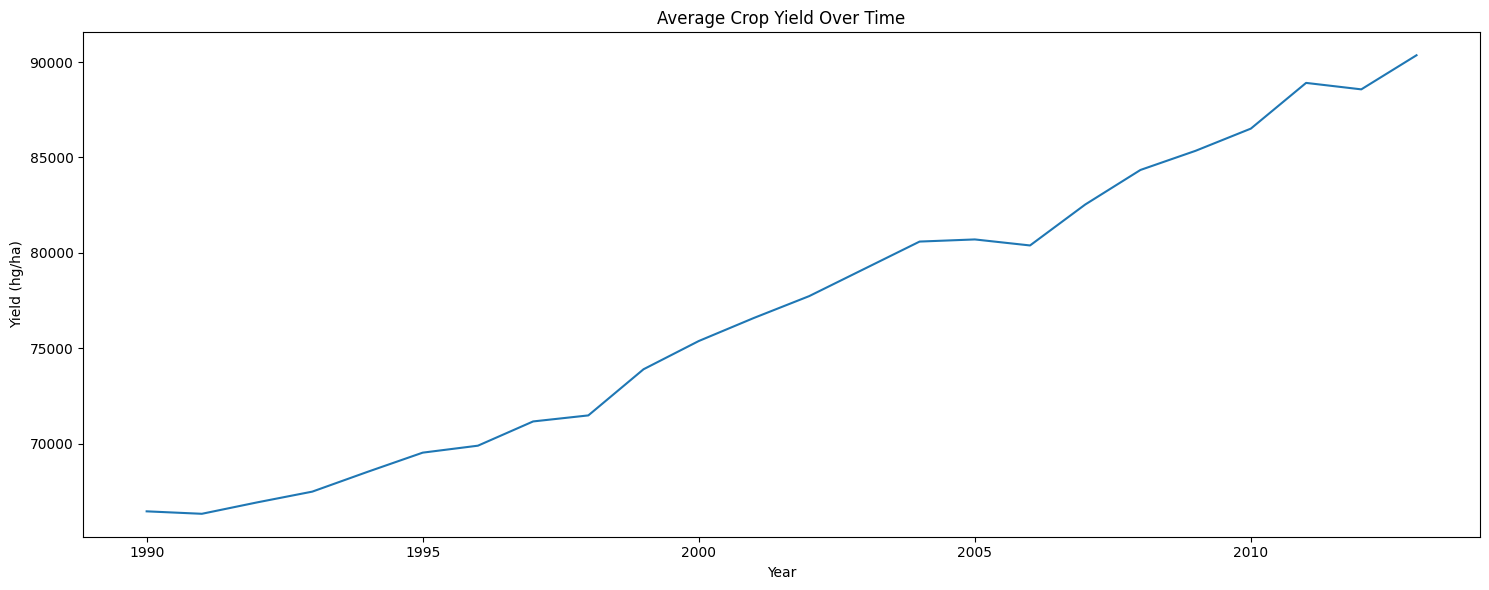

In [15]:
plt.figure(figsize=(15, 6))

# Plot average yield over years
sns.lineplot(data=df, x='Year', y='hg/ha_yield', ci=None)
plt.title('Average Crop Yield Over Time')
plt.xlabel('Year')
plt.ylabel('Yield (hg/ha)')
plt.tight_layout()
plt.show()

#Violin plot

<ipython-input-16-4159c1e4b851>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Item', y=feature, data=df, palette="muted", inner="box")


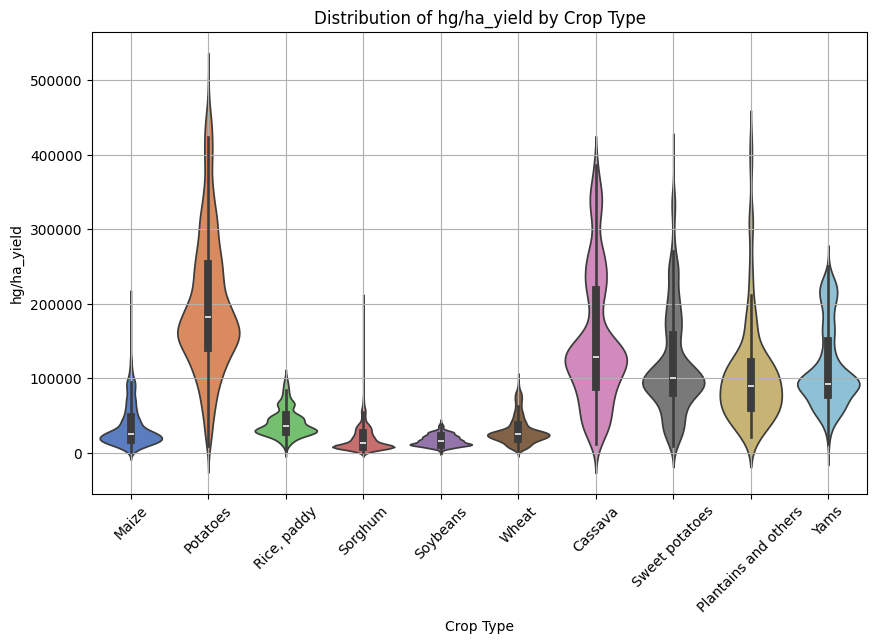

<ipython-input-16-4159c1e4b851>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Item', y=feature, data=df, palette="muted", inner="box")


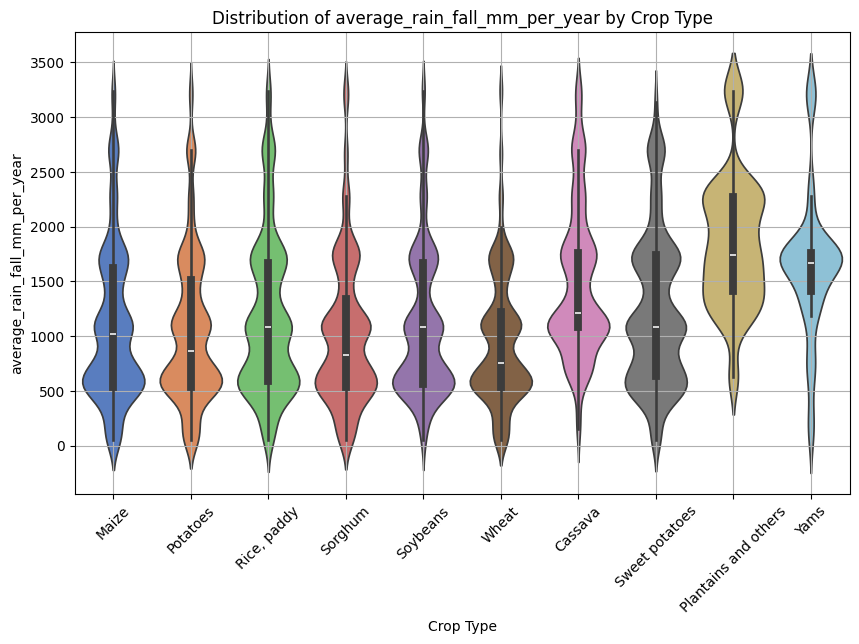

<ipython-input-16-4159c1e4b851>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Item', y=feature, data=df, palette="muted", inner="box")


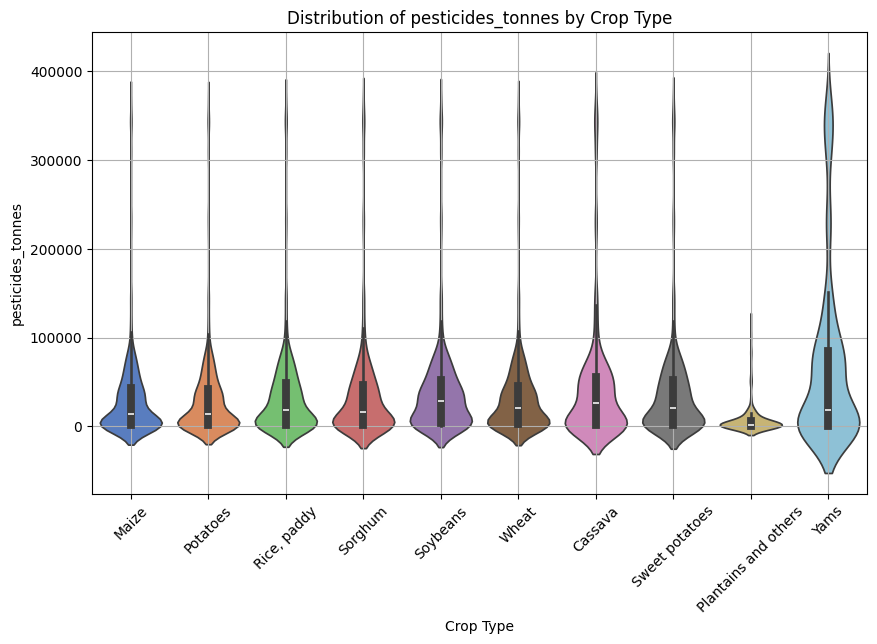

<ipython-input-16-4159c1e4b851>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Item', y=feature, data=df, palette="muted", inner="box")


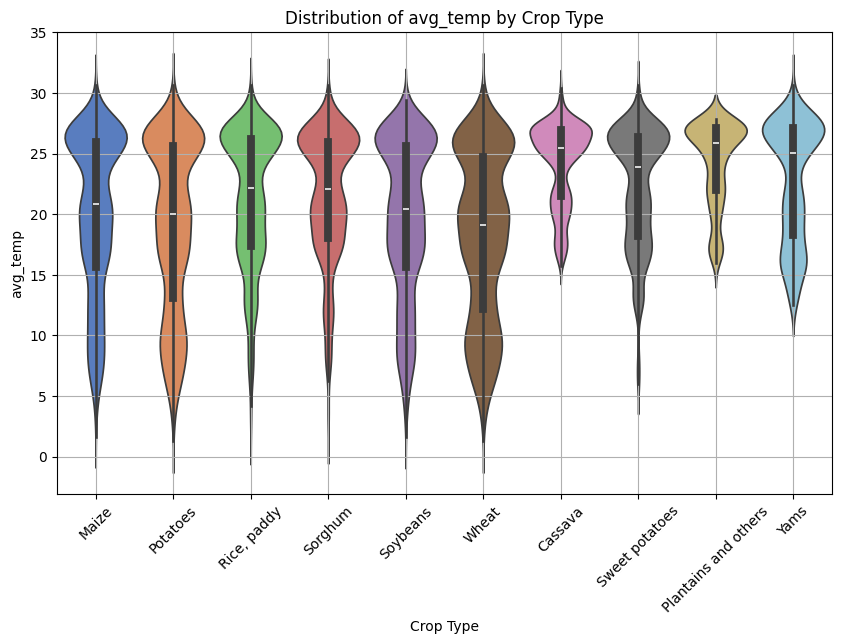

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot for numerical features grouped by 'Item' (Crop Type)
numerical_features = ['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Item', y=feature, data=df, palette="muted", inner="box")
    plt.title(f"Distribution of {feature} by Crop Type")
    plt.xticks(rotation=45)
    plt.xlabel("Crop Type")
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()




#Distribution Plot

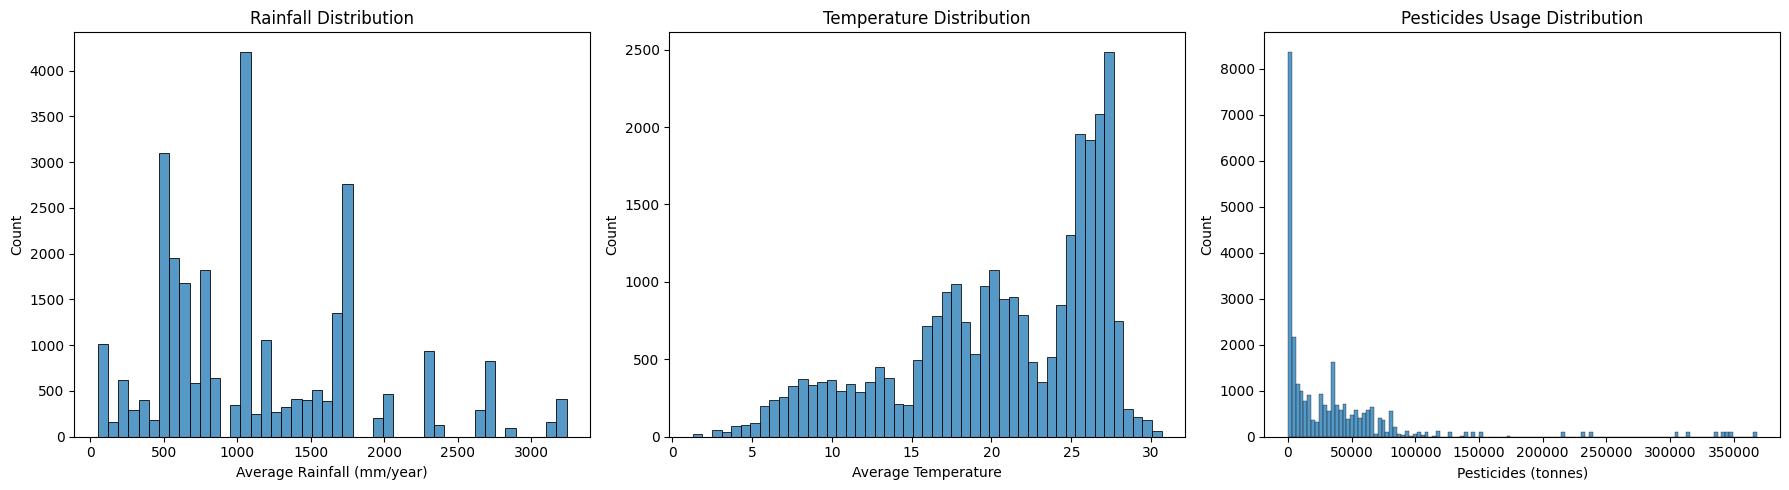

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Rainfall distribution
sns.histplot(data=df, x='average_rain_fall_mm_per_year', ax=axes[0])
axes[0].set_title('Rainfall Distribution')
axes[0].set_xlabel('Average Rainfall (mm/year)')

# Temperature distribution
sns.histplot(data=df, x='avg_temp', ax=axes[1])
axes[1].set_title('Temperature Distribution')
axes[1].set_xlabel('Average Temperature')

# Pesticides distribution
sns.histplot(data=df, x='pesticides_tonnes', ax=axes[2])
axes[2].set_title('Pesticides Usage Distribution')
axes[2].set_xlabel('Pesticides (tonnes)')

plt.tight_layout()
plt.show()

#Training the model

In [18]:
# Prepare features and target variable
# First, handle categorical variables
df_model = pd.get_dummies(df, columns=['Area', 'Item'])

# Select features
feature_columns = ['Year', 'average_rain_fall_mm_per_year',
                  'pesticides_tonnes', 'avg_temp'] + \
                 [col for col in df_model.columns if col.startswith(('Area_', 'Item_'))]

X = df_model[feature_columns]
y = df_model['hg/ha_yield']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

#Model Performance Metrics

In [19]:
# Calculate and print metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mse):.2f}")
print(f"R² Score: {r2:.2f}")


Model Performance Metrics:
Mean Squared Error: 90181642.98
Root Mean Squared Error: 9496.40
R² Score: 0.99


#**Feature Importance Visualization**

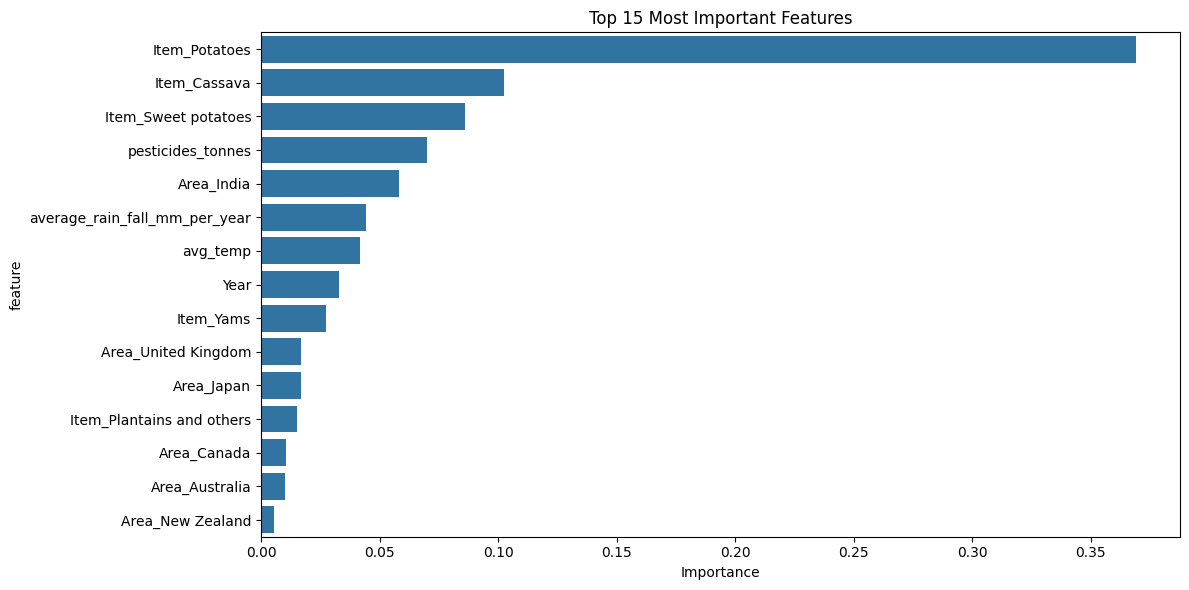

In [20]:
# Plot feature importance
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(15)  # Show top 15 features

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Top 15 Most Important Features')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

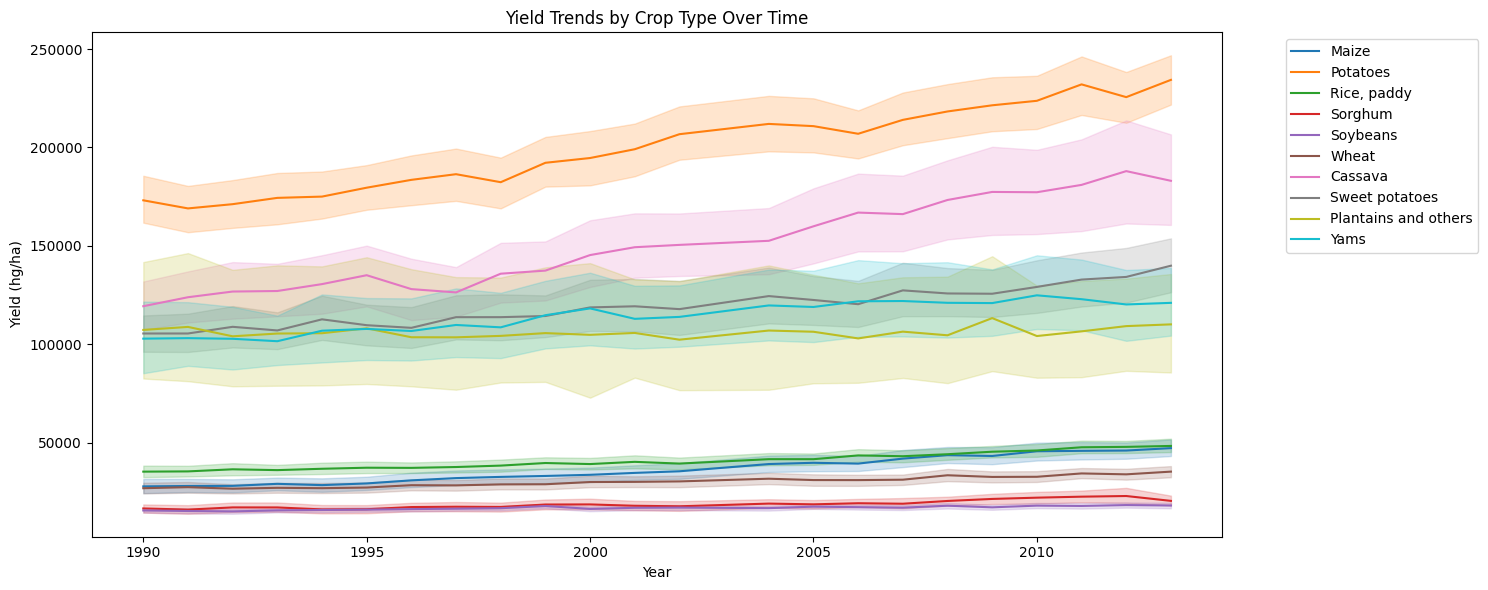

In [21]:
plt.figure(figsize=(15, 6))
for item in df['Item'].unique():
    item_data = df[df['Item'] == item]
    sns.lineplot(data=item_data, x='Year', y='hg/ha_yield', label=item)

plt.title('Yield Trends by Crop Type Over Time')
plt.xlabel('Year')
plt.ylabel('Yield (hg/ha)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#**Utilitarian Ethical Framework**

Model Performance Metrics:
Mean Absolute Error (MAE): 70951.28742866294
Root Mean Squared Error (RMSE): 93381.116162818
R² Score: -0.20215428693744752

Feature Importances:
                         Feature  Importance
0                       avg_temp    0.442045
2              pesticides_tonnes    0.335438
1  average_rain_fall_mm_per_year    0.222517

Utilitarian Ethical Framework Analysis:
Food Security: -20.22%
Resource Optimization: 7.92%
Economic Impact: -2.02%


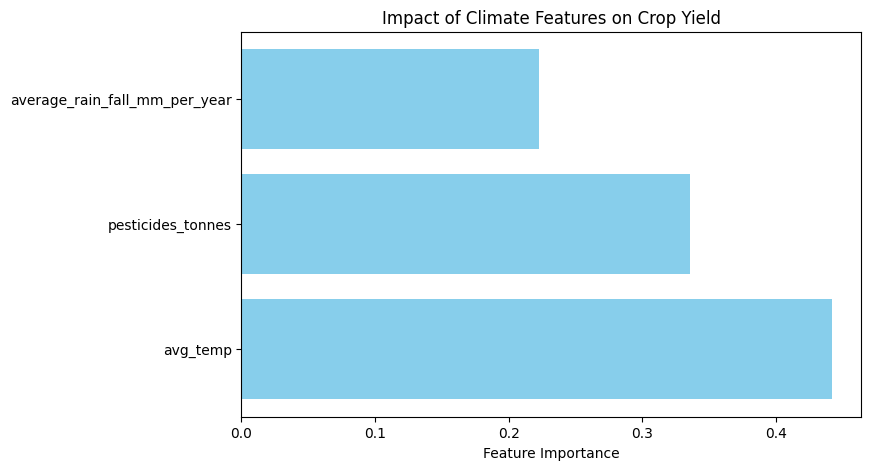

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("yield_df.csv")

# Define feature columns and target variable
features = ["avg_temp", "average_rain_fall_mm_per_year", "pesticides_tonnes"]
target = "hg/ha_yield"

# Split the data into train and test sets
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model performance
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print metrics for utilitarian analysis
print("Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Feature importance analysis
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

# Simulating Utilitarian Analysis
print("\nUtilitarian Ethical Framework Analysis:")
overall_benefit = {
    "Food Security": r2 * 100,  # Higher R² indicates better yield prediction accuracy
    "Resource Optimization": (1 - mae / y.mean()) * 100,  # Lower MAE means better resource use
    "Economic Impact": (r2 * 10),  # Example scaling for potential economic benefits
}

for key, value in overall_benefit.items():
    print(f"{key}: {value:.2f}%")

# Visualizing feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Impact of Climate Features on Crop Yield")
plt.show()


#Predictive Yield Map

In [23]:
import pandas as pd
df = pd.read_csv('yield_df.csv')
print(df['Area'].unique())

['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Canada' 'Central African Republic' 'Chile' 'Colombia' 'Croatia'
 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea'
 'Estonia' 'Finland' 'France' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'India' 'Indonesia' 'Iraq'
 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Kazakhstan' 'Kenya' 'Latvia'
 'Lebanon' 'Lesotho' 'Libya' 'Lithuania' 'Madagascar' 'Malawi' 'Malaysia'
 'Mali' 'Mauritania' 'Mauritius' 'Mexico' 'Montenegro' 'Morocco'
 'Mozambique' 'Namibia' 'Nepal' 'Netherlands' 'New Zealand' 'Nicaragua'
 'Niger' 'Norway' 'Pakistan' 'Papua New Guinea' 'Peru' 'Poland' 'Portugal'
 'Qatar' 'Romania' 'Rwanda' 'Saudi Arabia' 'Senegal' 'Slovenia'
 'South Africa' 'Spain' 'Sri Lanka' 'Sudan' 'Suriname' 'Sweden'
 'Switzerland' 'Tajikistan

In [24]:
import pandas as pd
import folium
import numpy as np

def create_agricultural_map():
    """
    Creates an interactive map visualizing agricultural yields globally
    """
    try:
        # Load the dataset
        data = pd.read_csv('yield_df.csv')

        # Country coordinates mapping
        location_map = {
            'Albania': (41.1533, 20.1683),
            'Algeria': (36.7538, 3.0588),
            'Angola': (-8.8399, 13.2894),
            'Argentina': (-34.6037, -58.3816),
            'Armenia': (40.0691, 45.0382),
            'Australia': (-25.2744, 133.7751),
            'Austria': (47.5162, 14.5501),
            'Azerbaijan': (40.1431, 47.5769),
            'Bahamas': (25.0343, -77.3963),
            'Bahrain': (26.0667, 50.5577),
            'Bangladesh': (23.6850, 90.3563),
            'Belarus': (53.7098, 27.9534),
            'Belgium': (50.8503, 4.3517),
            'Botswana': (-22.3285, 24.6849),
            'Brazil': (-14.2350, -51.9253),
            'Bulgaria': (42.7339, 25.4858),
            'Burkina Faso': (12.2383, -1.5616),
            'Burundi': (-3.3731, 29.9189),
            'Cameroon': (7.3697, 12.3547),
            'Canada': (56.1304, -106.3468),
            'Central African Republic': (6.6111, 20.9394),
            'Chile': (-35.6751, -71.5430),
            'Colombia': (4.5709, -74.2973),
            'Croatia': (45.1000, 15.2000),
            'Denmark': (56.2639, 9.5018),
            'Dominican Republic': (18.7357, -70.1627),
            'Ecuador': (-1.8312, -78.1834),
            'Egypt': (26.8206, 30.8025),
            'El Salvador': (13.7942, -88.8965),
            'Eritrea': (15.1794, 39.7823),
            'Estonia': (58.5953, 25.0136),
            'Finland': (61.9241, 25.7482),
            'France': (46.2276, 2.2137),
            'Germany': (51.1657, 10.4515),
            'Ghana': (7.9465, -1.0232),
            'Greece': (39.0742, 21.8243),
            'Guatemala': (15.7835, -90.2308),
            'Guinea': (9.9456, -9.6966),
            'Guyana': (4.8604, -58.9302),
            'Haiti': (18.9712, -72.2852),
            'Honduras': (15.1999, -86.2419),
            'Hungary': (47.1625, 19.5033),
            'India': (20.5937, 78.9629),
            'Indonesia': (-0.7893, 113.9213),
            'Iraq': (33.2232, 43.6793),
            'Ireland': (53.1424, -7.6921),
            'Italy': (41.8719, 12.5674),
            'Jamaica': (18.1096, -77.2975),
            'Japan': (36.2048, 138.2529),
            'Kazakhstan': (48.0196, 66.9237),
            'Kenya': (-0.0236, 37.9062),
            'Latvia': (56.8796, 24.6032),
            'Lebanon': (33.8547, 35.8623),
            'Lesotho': (-29.6099, 28.2336),
            'Libya': (26.3351, 17.2283),
            'Lithuania': (55.1694, 23.8813),
            'Madagascar': (-18.7669, 46.8691),
            'Malawi': (-13.2543, 34.3015),
            'Malaysia': (4.2105, 101.9758),
            'Mali': (17.5707, -3.9962),
            'Mauritania': (21.0079, -10.9408),
            'Mauritius': (-20.3484, 57.5522),
            'Mexico': (23.6345, -102.5528),
            'Montenegro': (42.7087, 19.3744),
            'Morocco': (31.7917, -7.0926),
            'Mozambique': (-18.6657, 35.5296),
            'Namibia': (-22.9576, 18.4904),
            'Nepal': (28.3949, 84.1240),
            'Netherlands': (52.1326, 5.2913),
            'New Zealand': (-40.9006, 174.8860),
            'Nicaragua': (12.8654, -85.2072),
            'Niger': (17.6078, 8.0817),
            'Norway': (60.4720, 8.4689),
            'Pakistan': (30.3753, 69.3451),
            'Papua New Guinea': (-6.3149, 143.9555),
            'Peru': (-9.1900, -75.0152),
            'Poland': (51.9194, 19.1451),
            'Portugal': (39.3999, -8.2245),
            'Qatar': (25.3548, 51.1839),
            'Romania': (45.9432, 24.9668),
            'Rwanda': (-1.9403, 29.8739),
            'Saudi Arabia': (23.8859, 45.0792),
            'Senegal': (14.4974, -14.4524),
            'Slovenia': (46.1512, 14.9955),
            'South Africa': (-30.5595, 22.9375),
            'Spain': (40.4637, -3.7492),
            'Sri Lanka': (7.8731, 80.7718),
            'Sudan': (12.8628, 30.2176),
            'Suriname': (3.9193, -56.0278),
            'Sweden': (60.1282, 18.6435),
            'Switzerland': (46.8182, 8.2275),
            'Tajikistan': (38.8610, 71.2761),
            'Thailand': (15.8700, 100.9925),
            'Tunisia': (33.8869, 9.5375),
            'Turkey': (38.9637, 35.2433),
            'Uganda': (1.3733, 32.2903),
            'Ukraine': (48.3794, 31.1656),
            'United Kingdom': (55.3781, -3.4360),
            'Uruguay': (-32.5228, -55.7658),
            'Zambia': (-13.1339, 27.8493),
            'Zimbabwe': (-19.0154, 29.1549)
        }

        # Add coordinates with validation
        data['latitude'] = data['Area'].map(lambda x: location_map.get(x, (None, None))[0])
        data['longitude'] = data['Area'].map(lambda x: location_map.get(x, (None, None))[1])

        # Remove rows with missing coordinates
        data = data.dropna(subset=['latitude', 'longitude'])

        if len(data) == 0:
            raise ValueError("No valid data points after removing missing coordinates")

        # Calculate map center - roughly center of the world map
        map_center = [20, 0]

        # Create base map
        agricultural_map = folium.Map(
            location=map_center,
            zoom_start=2,  # Zoomed out to show the whole world
            tiles='OpenStreetMap'
        )

        # Calculate statistics for coloring
        mean_yield = data['hg/ha_yield'].mean()

        # Add markers for each location
        for _, row in data.iterrows():
            is_high_yield = row['hg/ha_yield'] > mean_yield
            color = 'green' if is_high_yield else 'red'

            popup_html = f"""
                <div style='font-family: Arial; font-size: 12px; min-width: 200px;'>
                    <h4 style='margin-bottom: 5px;'>{row['Area']} - {row['Item']}</h4>
                    <b>Year:</b> {row['Year']}<br>
                    <b>Yield:</b> {row['hg/ha_yield']:.2f} hg/ha<br>
                    <b>Rainfall:</b> {row['average_rain_fall_mm_per_year']:.1f} mm/year<br>
                    <b>Temperature:</b> {row['avg_temp']:.1f}°C<br>
                    <b>Pesticides:</b> {row['pesticides_tonnes']:.2f} tonnes<br>
                    <b>Status:</b> {'Above' if is_high_yield else 'Below'} Average Yield
                </div>
            """

            folium.CircleMarker(
                location=[row['latitude'], row['longitude']],
                radius=8,  # Slightly smaller for global view
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=0.7,
                popup=folium.Popup(popup_html, max_width=300)
            ).add_to(agricultural_map)

        legend_html = """
        <div style="position: fixed;
                    bottom: 50px; right: 50px;
                    border:2px solid grey; z-index:9999;
                    background-color:white;
                    padding:10px;
                    font-size:14px;
                    font-family: Arial;">
            <p style="margin-bottom:5px"><b>Yield Performance</b></p>
            <p>
                <span style="color:green;">●</span> Above Average Yield<br>
                <span style="color:red;">●</span> Below Average Yield
            </p>
        </div>
        """
        agricultural_map.get_root().html.add_child(folium.Element(legend_html))

        return agricultural_map

    except Exception as e:
        print(f"Error creating map: {str(e)}")
        return None

# Execute the function and save the map
map_visualization = create_agricultural_map()
if map_visualization:
    map_visualization.save('agricultural_yield_map.html')
    print("Map has been created successfully and saved as 'agricultural_yield_map.html'")

Map has been created successfully and saved as 'agricultural_yield_map.html'


(Agricultural Yield Performance Map):
- Displays agricultural yield performance using dot markers
- Green dots indicate Above Average Yield
- Red dots indicate Below Average Yield
- Shows a concerning pattern where many areas have below average yields (red dots), particularly in:
  - Northern Africa
  - Parts of Europe
  - Large portions of North America
- Some regions show above average yields (green dots) scattered across:
  - Parts of South America
  - Some areas in Asia
  - Isolated locations in Africa



#Risk Heatmap

In [25]:
import pandas as pd
import folium
from folium.plugins import HeatMap

def create_rainfall_heatmap():
    """
    Creates a heatmap visualization of rainfall patterns globally
    """
    try:
        # Load the dataset
        data = pd.read_csv('yield_df.csv')

        # Country coordinates mapping
        location_map = {
            'Albania': (41.1533, 20.1683),
            'Algeria': (36.7538, 3.0588),
            'Angola': (-8.8399, 13.2894),
            'Argentina': (-34.6037, -58.3816),
            'Armenia': (40.0691, 45.0382),
            'Australia': (-25.2744, 133.7751),
            'Austria': (47.5162, 14.5501),
            'Azerbaijan': (40.1431, 47.5769),
            'Bahamas': (25.0343, -77.3963),
            'Bahrain': (26.0667, 50.5577),
            'Bangladesh': (23.6850, 90.3563),
            'Belarus': (53.7098, 27.9534),
            'Belgium': (50.8503, 4.3517),
            'Botswana': (-22.3285, 24.6849),
            'Brazil': (-14.2350, -51.9253),
            'Bulgaria': (42.7339, 25.4858),
            'Burkina Faso': (12.2383, -1.5616),
            'Burundi': (-3.3731, 29.9189),
            'Cameroon': (7.3697, 12.3547),
            'Canada': (56.1304, -106.3468),
            'Central African Republic': (6.6111, 20.9394),
            'Chile': (-35.6751, -71.5430),
            'Colombia': (4.5709, -74.2973),
            'Croatia': (45.1000, 15.2000),
            'Denmark': (56.2639, 9.5018),
            'Dominican Republic': (18.7357, -70.1627),
            'Ecuador': (-1.8312, -78.1834),
            'Egypt': (26.8206, 30.8025),
            'El Salvador': (13.7942, -88.8965),
            'Eritrea': (15.1794, 39.7823),
            'Estonia': (58.5953, 25.0136),
            'Finland': (61.9241, 25.7482),
            'France': (46.2276, 2.2137),
            'Germany': (51.1657, 10.4515),
            'Ghana': (7.9465, -1.0232),
            'Greece': (39.0742, 21.8243),
            'Guatemala': (15.7835, -90.2308),
            'Guinea': (9.9456, -9.6966),
            'Guyana': (4.8604, -58.9302),
            'Haiti': (18.9712, -72.2852),
            'Honduras': (15.1999, -86.2419),
            'Hungary': (47.1625, 19.5033),
            'India': (20.5937, 78.9629),
            'Indonesia': (-0.7893, 113.9213),
            'Iraq': (33.2232, 43.6793),
            'Ireland': (53.1424, -7.6921),
            'Italy': (41.8719, 12.5674),
            'Jamaica': (18.1096, -77.2975),
            'Japan': (36.2048, 138.2529),
            'Kazakhstan': (48.0196, 66.9237),
            'Kenya': (-0.0236, 37.9062),
            'Latvia': (56.8796, 24.6032),
            'Lebanon': (33.8547, 35.8623),
            'Lesotho': (-29.6099, 28.2336),
            'Libya': (26.3351, 17.2283),
            'Lithuania': (55.1694, 23.8813),
            'Madagascar': (-18.7669, 46.8691),
            'Malawi': (-13.2543, 34.3015),
            'Malaysia': (4.2105, 101.9758),
            'Mali': (17.5707, -3.9962),
            'Mauritania': (21.0079, -10.9408),
            'Mauritius': (-20.3484, 57.5522),
            'Mexico': (23.6345, -102.5528),
            'Montenegro': (42.7087, 19.3744),
            'Morocco': (31.7917, -7.0926),
            'Mozambique': (-18.6657, 35.5296),
            'Namibia': (-22.9576, 18.4904),
            'Nepal': (28.3949, 84.1240),
            'Netherlands': (52.1326, 5.2913),
            'New Zealand': (-40.9006, 174.8860),
            'Nicaragua': (12.8654, -85.2072),
            'Niger': (17.6078, 8.0817),
            'Norway': (60.4720, 8.4689),
            'Pakistan': (30.3753, 69.3451),
            'Papua New Guinea': (-6.3149, 143.9555),
            'Peru': (-9.1900, -75.0152),
            'Poland': (51.9194, 19.1451),
            'Portugal': (39.3999, -8.2245),
            'Qatar': (25.3548, 51.1839),
            'Romania': (45.9432, 24.9668),
            'Rwanda': (-1.9403, 29.8739),
            'Saudi Arabia': (23.8859, 45.0792),
            'Senegal': (14.4974, -14.4524),
            'Slovenia': (46.1512, 14.9955),
            'South Africa': (-30.5595, 22.9375),
            'Spain': (40.4637, -3.7492),
            'Sri Lanka': (7.8731, 80.7718),
            'Sudan': (12.8628, 30.2176),
            'Suriname': (3.9193, -56.0278),
            'Sweden': (60.1282, 18.6435),
            'Switzerland': (46.8182, 8.2275),
            'Tajikistan': (38.8610, 71.2761),
            'Thailand': (15.8700, 100.9925),
            'Tunisia': (33.8869, 9.5375),
            'Turkey': (38.9637, 35.2433),
            'Uganda': (1.3733, 32.2903),
            'Ukraine': (48.3794, 31.1656),
            'United Kingdom': (55.3781, -3.4360),
            'Uruguay': (-32.5228, -55.7658),
            'Zambia': (-13.1339, 27.8493),
            'Zimbabwe': (-19.0154, 29.1549)
        }

        # Add coordinates with validation
        data['latitude'] = data['Area'].map(lambda x: location_map.get(x, (None, None))[0])
        data['longitude'] = data['Area'].map(lambda x: location_map.get(x, (None, None))[1])

        # Remove rows with missing coordinates
        data = data.dropna(subset=['latitude', 'longitude'])

        if len(data) == 0:
            raise ValueError("No valid data points after removing missing coordinates")

        # Create base map centered at (0, 0) to show the whole world
        rainfall_heatmap = folium.Map(
            location=[20, 0],
            zoom_start=2,
            tiles='OpenStreetMap'
        )

        # Prepare data for heatmap
        # Normalize rainfall data to better visualize the heatmap
        max_rainfall = data['average_rain_fall_mm_per_year'].max()
        heat_data = data[['latitude', 'longitude', 'average_rain_fall_mm_per_year']].values.tolist()

        # Add heatmap layer
        HeatMap(
            heat_data,
            min_opacity=0.4,
            max_val=max_rainfall,
            radius=25,
            blur=15,
            gradient={
                0.2: 'blue',
                0.4: 'cyan',
                0.6: 'lime',
                0.8: 'yellow',
                1: 'red'
            }
        ).add_to(rainfall_heatmap)

        # Add a legend
        legend_html = """
        <div style="position: fixed;
                    bottom: 50px; right: 50px;
                    border:2px solid grey; z-index:9999;
                    background-color:white;
                    padding:10px;
                    font-size:14px;
                    font-family: Arial;">
            <p style="margin-bottom:5px"><b>Rainfall Intensity</b></p>
            <div style="display:flex;flex-direction:column;gap:5px;">
                <div><span style="color:red;">■</span> Very High</div>
                <div><span style="color:yellow;">■</span> High</div>
                <div><span style="color:lime;">■</span> Medium</div>
                <div><span style="color:cyan;">■</span> Low</div>
                <div><span style="color:blue;">■</span> Very Low</div>
            </div>
        </div>
        """
        rainfall_heatmap.get_root().html.add_child(folium.Element(legend_html))

        return rainfall_heatmap

    except Exception as e:
        print(f"Error creating heatmap: {str(e)}")
        return None

# Execute the function and save the map
heatmap_visualization = create_rainfall_heatmap()
if heatmap_visualization:
    heatmap_visualization.save('rainfall_heatmap.html')
    print("Heatmap has been created successfully and saved as 'rainfall_heatmap.html'")

Heatmap has been created successfully and saved as 'rainfall_heatmap.html'


<ipython-input-25-9e44995d0627>:141: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(



(Rainfall Intensity Map):
- Shows a heatmap of rainfall intensity across different regions
- Uses color coding from Very Low (blue) to Very High (red)
- Highest rainfall intensities appear in parts of South America and central Africa
- Medium to high rainfall patterns are visible across parts of North America and Europe
- Shows distinct rainfall patterns with clear hotspots in tropical regions

Interesting Correlation: There seems to be a relationship between rainfall patterns and agricultural yield, though not all high-rainfall areas necessarily show high yields, suggesting other factors also influence agricultural performance.





#Time series by crop time

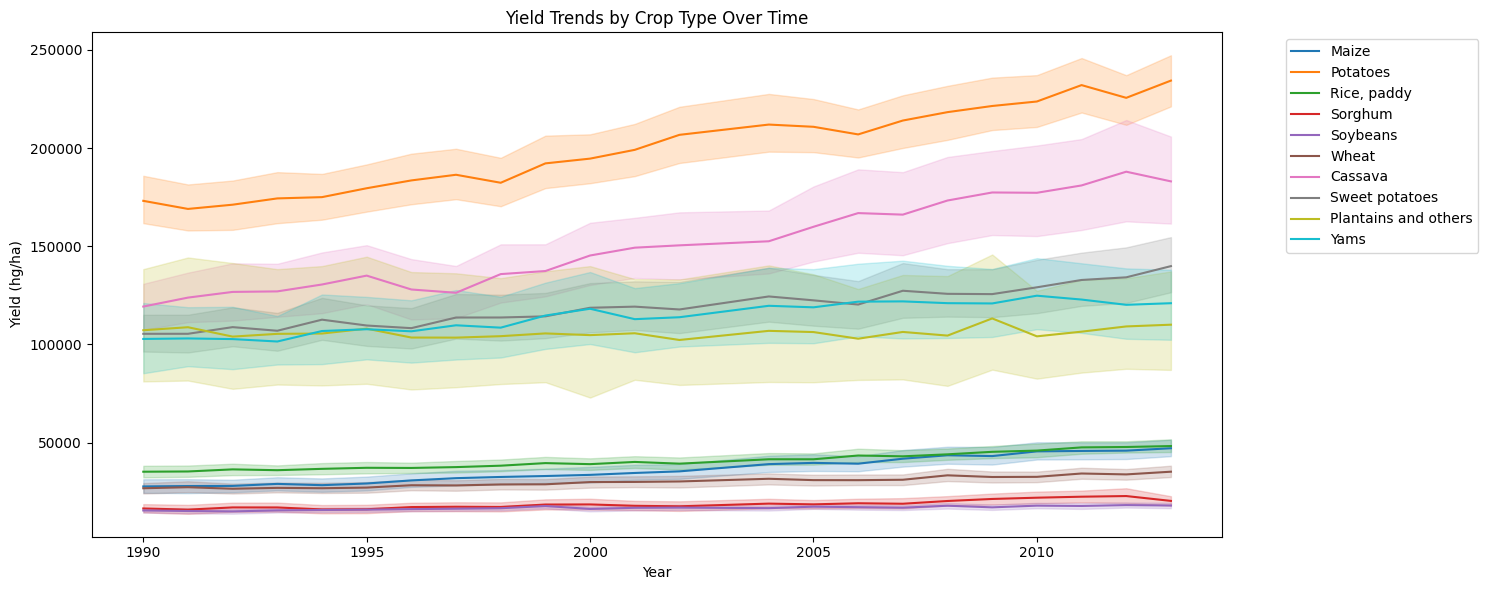

In [26]:
plt.figure(figsize=(15, 6))
for item in df['Item'].unique():
    item_data = df[df['Item'] == item]
    sns.lineplot(data=item_data, x='Year', y='hg/ha_yield', label=item)

plt.title('Yield Trends by Crop Type Over Time')
plt.xlabel('Year')
plt.ylabel('Yield (hg/ha)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [27]:
# Define numerical columns
numerical_cols = ["avg_temp", "average_rain_fall_mm_per_year", "pesticides_tonnes", "hg/ha_yield"]

# Print summary statistics for numerical features
print("\nSummary Statistics for Numerical Features:")
print(df[numerical_cols].describe())

# Print summary for categorical features
print("\nCrop Types (Items):")
print(df['Item'].value_counts())
print("\nNumber of Areas:", df['Area'].nunique())
print("Year Range:", df['Year'].min(), "to", df['Year'].max())



Summary Statistics for Numerical Features:
           avg_temp  average_rain_fall_mm_per_year  pesticides_tonnes  \
count  28242.000000                    28242.00000       28242.000000   
mean      20.542627                     1149.05598       37076.909344   
std        6.312051                      709.81215       59958.784665   
min        1.300000                       51.00000           0.040000   
25%       16.702500                      593.00000        1702.000000   
50%       21.510000                     1083.00000       17529.440000   
75%       26.000000                     1668.00000       48687.880000   
max       30.650000                     3240.00000      367778.000000   

         hg/ha_yield  
count   28242.000000  
mean    77053.332094  
std     84956.612897  
min        50.000000  
25%     19919.250000  
50%     38295.000000  
75%    104676.750000  
max    501412.000000  

Crop Types (Items):
Item
Potatoes                4276
Maize                   4121
Wheat  

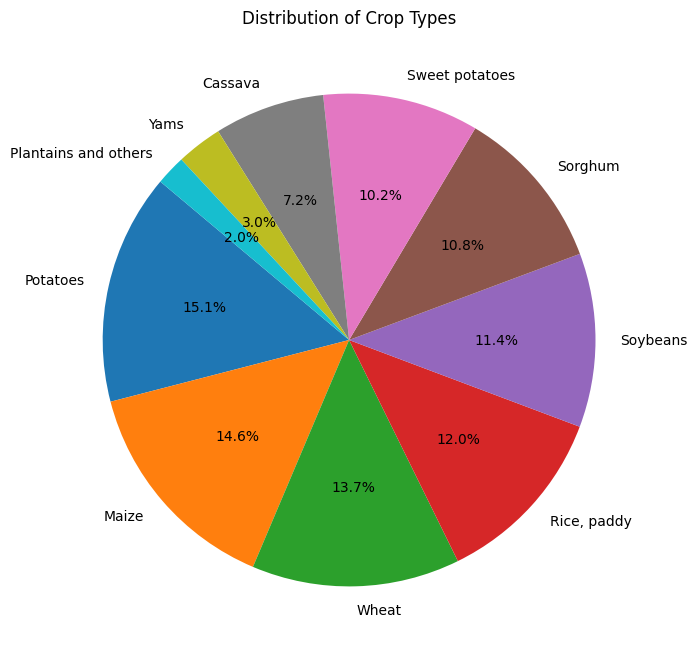

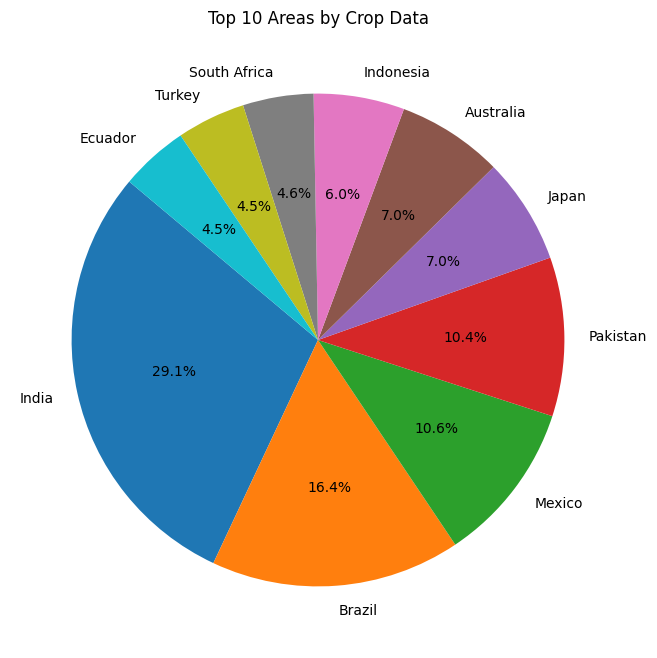

In [28]:
import matplotlib.pyplot as plt



# Pie chart for Crop Types
crop_counts = df['Item'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(crop_counts, labels=crop_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Crop Types")
plt.show()

# Pie chart for Areas
area_counts = df['Area'].value_counts()
top_areas = area_counts[:10]  # Limit to top 10 areas for clarity
plt.figure(figsize=(8, 8))
plt.pie(top_areas, labels=top_areas.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Areas by Crop Data")
plt.show()
